In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
path = Config().data_path()/'mnist'

In [4]:
#easiest way to download any file 
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz -P {path}

--2020-08-23 08:29:38--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘/root/.fastai/data/mnist/mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  10.6MB/s    in 1.4s    

2020-08-23 08:29:39 (10.6 MB/s) - ‘/root/.fastai/data/mnist/mnist.pkl.gz’ saved [16168813/16168813]



In [5]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

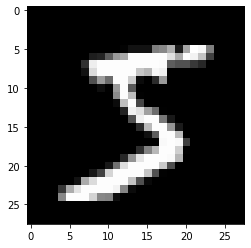

In [6]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [7]:
#converting numpy arrays to torch tensors
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In lesson 2 we wrote functions for adding bias,calculating mse and matrix multipications but here we will use Pytorch doing this all where it will take data in mini batches as our data is big compared to last time

In [8]:
bs=64
#grab anykind of tensor and make a data set
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
#creating data loaders to get the next thing and it will give you mini batch 
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [9]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [10]:
#creating logistic regression/one layer neural network model
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [11]:
#to get our parameters on GPU manually use cuda 
model = Mnist_Logistic()

In [12]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [13]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [14]:
model(x).shape

torch.Size([64, 10])

In [15]:
model.parameters

<bound method Module.parameters of Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)>

In [16]:
#it has created 784 dimnesional input with bias vector of length 10 
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [17]:
lr=2e-2

In [18]:
loss_func = nn.CrossEntropyLoss()

In [19]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [20]:
losses = [update(x,y,lr) for x,y in data.train_dl]

In [21]:
losses

[2.3263134956359863,
 2.2777597904205322,
 2.2760400772094727,
 2.1815879344940186,
 2.191498041152954,
 2.1506917476654053,
 2.185580253601074,
 2.158618927001953,
 2.1823484897613525,
 2.1552622318267822,
 2.0845212936401367,
 2.055497169494629,
 2.0488498210906982,
 2.090254783630371,
 1.9664682149887085,
 1.9664722681045532,
 2.0170047283172607,
 2.032790184020996,
 1.9073295593261719,
 1.9825698137283325,
 1.9704148769378662,
 1.8332775831222534,
 1.8461717367172241,
 1.9113633632659912,
 1.879184365272522,
 1.9427577257156372,
 1.887271523475647,
 1.8078666925430298,
 1.798671007156372,
 1.7460108995437622,
 1.84076726436615,
 1.814985990524292,
 1.745812177658081,
 1.7626001834869385,
 1.678945541381836,
 1.7514690160751343,
 1.7579915523529053,
 1.7441115379333496,
 1.6935911178588867,
 1.6688326597213745,
 1.6561211347579956,
 1.6494308710098267,
 1.642013430595398,
 1.5938665866851807,
 1.6309950351715088,
 1.6016204357147217,
 1.5672144889831543,
 1.4756600856781006,
 1.5866

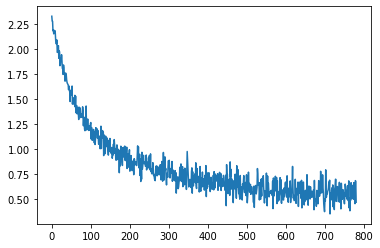

In [22]:
plt.plot(losses)

 2 layer Neural Network from Scratch 

In [34]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [24]:
model = Mnist_NN()

In [25]:
losses = [update(x,y,lr) for x,y in data.train_dl]

In [26]:
losses

[2.311070203781128,
 2.2989273071289062,
 2.3199303150177,
 2.2954089641571045,
 2.281841278076172,
 2.299241065979004,
 2.265286922454834,
 2.2903783321380615,
 2.2857329845428467,
 2.278125762939453,
 2.26802396774292,
 2.270418882369995,
 2.2586236000061035,
 2.2605512142181396,
 2.264300584793091,
 2.2501959800720215,
 2.2617030143737793,
 2.235933780670166,
 2.243058443069458,
 2.255051374435425,
 2.266042709350586,
 2.245593786239624,
 2.206925630569458,
 2.233441114425659,
 2.2310476303100586,
 2.2499518394470215,
 2.205925226211548,
 2.2134859561920166,
 2.2213447093963623,
 2.222397565841675,
 2.215709686279297,
 2.199737787246704,
 2.183055877685547,
 2.2228798866271973,
 2.201561212539673,
 2.1657252311706543,
 2.1823313236236572,
 2.185746431350708,
 2.1736369132995605,
 2.1684212684631348,
 2.1465041637420654,
 2.1698901653289795,
 2.1542413234710693,
 2.1472842693328857,
 2.1298460960388184,
 2.15869140625,
 2.1413936614990234,
 2.152524948120117,
 2.159332036972046,
 2.1

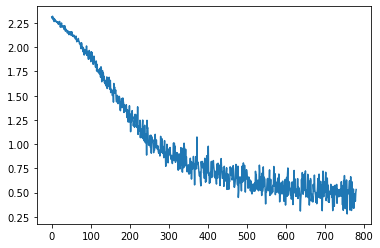

In [27]:
plt.plot(losses)

In [35]:
model = Mnist_NN()

In [36]:
#designing more optimized update function using pytorch but with Adam optimizer instead of SGD
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    #same as update rule
    opt.step()
    opt.zero_grad()
    return loss.item()

In [37]:
#using lr = 1e-3 beacause it diverged on previous lr
losses = [update(x,y,1e-3) for x,y in data.train_dl]

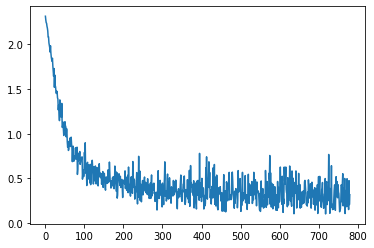

In [38]:
plt.plot(losses)

In [40]:
#fast ai learner does the same job
learn =Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


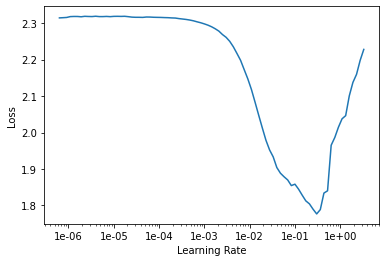

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.142076,0.141481,0.961100,00:03


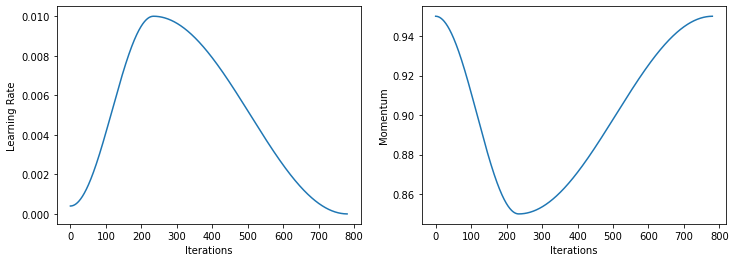

In [44]:
learn.recorder.plot_lr(show_moms=True)

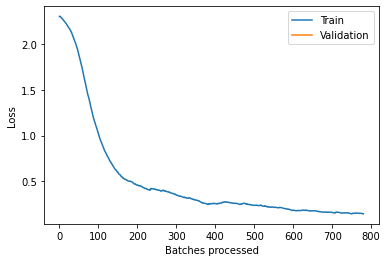

In [45]:
#with fast ai we get exponentially moving weighted average  losses 
learn.recorder.plot_losses()